In [ ]:
!pip install --upgrade tensorflow

In [ ]:
!pip install tweet-preprocessor

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.neural_network import MLPClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.model_selection import train_test_split,cross_val_score, cross_val_predict
from tensorflow.keras.layers import (Embedding, Dense, Activation, Dropout, LSTM, GRU, RNN, BatchNormalization, Flatten,
                                    Convolution1D, CategoryEncoding, GlobalMaxPool1D, Bidirectional, Conv1D, MaxPooling1D)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.metrics import (classification_report,precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error,
                            roc_curve, auc, confusion_matrix)

In [ ]:
import nltk
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import TextVectorization
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/TruthSeeker/Truth_Seeker_Model_Dataset.csv',header= 0)

In [ ]:
df.head()

In [ ]:
#make label column
def conversion(data):
  if (data['target'] == True and data['3_label_majority_answer'] == 'Agree') or (data['target'] == False and data['3_label_majority_answer'] == 'Disagree'):
    return 1
  else:
    return 0

In [ ]:
df['truthfullness']=df.apply(conversion,axis=1)

In [ ]:
df.truthfullness.value_counts()

1    68985
0    65213
Name: truthfullness, dtype: int64

In [ ]:
from transformers import AutoTokenizer
from transformers import pipeline
import preprocessor


In [ ]:
# Function to preprocess tweet using tweet-preprocessor
def preprocess_tweet(tweet):
    cleaned_tweet = preprocessor.clean(tweet)
    return cleaned_tweet

In [ ]:
df['cleaned_tweet'] = df['tweet'].apply(preprocess_tweet)

In [ ]:
# Download necessary NLTK resources (first time only)
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)

True

In [ ]:
def preprocess_tweet(tweet):

  # Lowercase the text
  tweet = tweet.lower()

  # Remove URLs and hashtags
  tweet = re.sub(r"http\S+|#\S+", "", tweet)

  # Remove mentions
  tweet = re.sub(r"@\S+", "@user", tweet)

  # Remove emojis (optional)
  tweet = re.sub(r"[^\w\s]", "", tweet)  # Uncomment to remove emojis

  # Remove punctuation
  tweet = re.sub(r"[^a-zA-Z\s]", "", tweet)

  # Remove extra spaces
  tweet = re.sub(r"\s+", " ", tweet).strip()

  # Remove stop words (optional)
  stop_words = set(stopwords.words("english"))
  tweet = ' '.join([word for word in tweet.split() if word not in stop_words])

  # Perform lemmatization
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token) for token in tweet.split()]

  preprocessed_tweet = " ".join(tokens)


  # Tokenize (optional)
  # tokens = nltk.word_tokenize(tweet)  # Uncomment to tokenize

  return preprocessed_tweet



In [ ]:
df['clean']=df['tweet'].apply(preprocess_tweet)

In [ ]:
df[['clean','cleaned_tweet']]

,clean,cleaned_tweet
0,user biden blunder month update inflation delt...,"Biden Blunders - Month UpdateInflation, Delta ..."
1,user user user many people literally starving ...,Not as many people are literally starving and ...
2,supreme court siding super rich property owner...,THE SUPREME COURT is siding with super rich pr...
3,user biden blunder broken campaign promise inf...,"Biden BlundersBroken campaign promises, Inflat..."
4,user agree confluence event right unprecedente...,I agree. The confluence of events right now is...
...,...,...
134193,joe bidens family owned african slave joe bide...,Joe Biden's family owned African slaves....Joe...
134194,joe bidens great great grandfather slave owner...,"Joe Bidens great, great grandfather was a slav..."
134195,user joe bidens greatgrandfather joseph j bide...,"""Joe Bidens great-grandfather Joseph J. Biden ..."
134196,user fact bidens vp kamala harris great great ...,Facts are Bidens VP Kamala Harris Great Great ...


In [ ]:
# Example usage
tweet = "I'm going to school. @POTUS Biden Blunders - 6 Month Update Inflation, Delta mismanagement, COVID for kids, Abandoning Americans in Afghanistan, Arming the Taliban, S. Border crisis, Breaking job growth, Abuse of power (Many Exec Orders, $3.5T through Reconciliation, Eviction Moratorium)...what did I miss? "
preprocessed_tweet = preprocess_tweet(tweet)

print(preprocessed_tweet)  # Output: "user tweet hashtag mentions"

im going school user biden blunder month update inflation delta mismanagement covid kid abandoning american afghanistan arming taliban border crisis breaking job growth abuse power many exec order reconciliation eviction moratoriumwhat miss


In [ ]:
tweet="I'm going to school. I eat fishes for fishing"
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(token) for token in tweet.split()]

In [ ]:
words=['fishing', 'fishes', 'fished']
for word in words:
  print(f"lemma = {lemmatizer.lemmatize(word)}")

lemma = fishing
lemma = fish
lemma = fished


In [ ]:
[lemmatizer.lemmatize(word) for word in tweet.split()]

["I'm", 'going', 'to', 'school.', 'I', 'eat', 'fish', 'for', 'fishing']

In [ ]:
!pip install cleantext

In [ ]:
from cleantext import clean

In [ ]:
def clean_text(text):
  cleaned_text = clean(text)
  return cleaned_text

In [ ]:
def clean_text(text):
  cleaned_text = clean(
                    text,
                    fix_unicode=True,
                    to_ascii=True,
                    lower=True,
                    no_line_breaks=True,
                    no_urls=True,
                    no_emails=True,
                    no_phone_number=True,
                    no_numbers=True,
                    no_digits=True,
                    no_currency_symbols=True,
                    no_punct=True,
                    no_hashtags=True,
                    no_emoji=True,
                    no_special_chars=True)
  return cleaned_text

In [ ]:
df['cleaned_tweet2']=df['cleaned_tweet'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df[['tweet','cleaned_tweet']]

In [ ]:
def preprocess_tweets(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)

    # Remove hashtags (#)
    text = re.sub(r'#\w+', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Perform stemming (optional)
    porter_stemmer = PorterStemmer()
    tokens = [porter_stemmer.stem(word) for word in tokens]

    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

In [ ]:
# Example usage
raw_tweet = "Check out this  2 amazing tweet! ########NLTK. I have $2 . couldn't you are going to school???"
preprocessed_tweet = preprocess_tweets(raw_tweet)

print("Original Tweet:", raw_tweet)
print("Preprocessed Tweet:", preprocessed_tweet)

Original Tweet: Check out this  2 amazing tweet! ########NLTK. I have $2 . couldn't you are going to school???
Preprocessed Tweet: check amaz tweet couldnt go school


In [ ]:
df['preprocessed_tweet']=df['tweet'].apply(preprocess_tweets)

In [ ]:
df[['tweet','cleaned_tweet', 'preprocessed_tweet']]

In [ ]:
senti = pipeline(task="sentiment-analysis")

In [ ]:
df['sentiment']=df['cleaned_tweet'].apply(senti)

In [ ]:
text_classifier = pipeline("text-classification")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
df['classification']=df['cleaned_tweet'].apply(text_classifier)

In [ ]:
# Load BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the tweets
tokenized_tweets = df['clean'].astype(str).apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Tokenize all tweets and store the lengths
token_lengths = [len(tokens) for tokens in tokenized_tweets]

# Calculate the maximum length
max_length = max(token_lengths)

In [ ]:
max_length

95

In [ ]:
max_length = max(len(tokens) for tokens in tokenized_tweets)

print(max_length)

95


In [ ]:
X = pad_sequences(tokenized_tweets, maxlen=max_length, padding='post', truncating='post')

In [ ]:
X = pad_sequences(tokenized_tweets, maxlen=145, padding='post', truncating='post')

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token="OOV")
tokenizer.fit_on_texts(df['tweet'].astype(str))
sequences = tokenizer.texts_to_sequences(df['tweet'].astype(str))
X = pad_sequences(sequences, maxlen=145)  # Adjust the max length according to your data

In [ ]:
labels=df['truthfullness'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(107358, 145)

In [ ]:
unique_values, counts = np.unique(to_categorical(np.array(y_test)), return_counts=True)
unique_values

array([0., 1.], dtype=float32)

In [ ]:
#Access the vocabulary
vocab = tokenizer.get_vocab()

# Convert the vocabulary to a word index dictionary
word_index = {word: idx for idx, word in enumerate(vocab)}

# Print the word index
print(word_index)

{'securities': 0, '##ffle': 1, '##xin': 2, 'sam': 3, 'consultation': 4, 'mel': 5, 'cds': 6, 'surfaces': 7, 'frowning': 8, 'д': 9, 'justified': 10, 'tourists': 11, '州': 12, 'aircraft': 13, '138': 14, '[unused634]': 15, 'gettysburg': 16, 'same': 17, '##das': 18, '##horn': 19, 'magnus': 20, 'bavaria': 21, 'archibald': 22, 'nadia': 23, 'associates': 24, 'alicia': 25, 'heritage': 26, '##free': 27, 'norman': 28, 'tapes': 29, 'street': 30, 'hurdle': 31, '##zi': 32, 'abstracts': 33, 'cows': 34, '##vius': 35, 'nicaragua': 36, '##龸': 37, 'triangular': 38, 'pitt': 39, 'robber': 40, 'reviews': 41, '##ku': 42, 'christophe': 43, 'cv': 44, '##bang': 45, 'unlawful': 46, 'hasan': 47, 'mcgill': 48, 'mendes': 49, 'sparrow': 50, 'dismissed': 51, '##away': 52, 'corrections': 53, 'specialising': 54, 'china': 55, 'fog': 56, 'substituted': 57, 'gunshot': 58, 'albanians': 59, 'teddy': 60, '[unused987]': 61, 'dealers': 62, 'impaired': 63, 'review': 64, 'payne': 65, '##view': 66, 'cod': 67, 'lookout': 68, 'hirsc

In [ ]:
np.unique(labels)

array([0, 1])

In [ ]:
len(word_index)

30522

In [ ]:
model = Sequential([
    Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=95),
    Bidirectional(LSTM(100, return_sequences=True)),
    LSTM(32,return_sequences=True),
    GlobalMaxPool1D(),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer='L1L2'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 95, 100)           3052300   
                                                                 
 bidirectional_2 (Bidirecti  (None, 95, 200)           160800    
 onal)                                                           
                                                                 
 lstm_3 (LSTM)               (None, 95, 32)            29824     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)               

In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

Epoch 1/3
1678/1678 [==============================] - 960s 567ms/step - loss: 0.2879 - accuracy: 0.9072 - val_loss: 0.2213 - val_accuracy: 0.9364
Epoch 2/3
1678/1678 [==============================] - 942s 561ms/step - loss: 0.2224 - accuracy: 0.9397 - val_loss: 0.2250 - val_accuracy: 0.9333
Epoch 3/3
1678/1678 [==============================] - 948s 565ms/step - loss: 0.1988 - accuracy: 0.9481 - val_loss: 0.2346 - val_accuracy: 0.9324


In [ ]:
model = Sequential([
    Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=95),
    Convolution1D(filters=32, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32,return_sequences=True)),
    GlobalMaxPool1D(),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer='L1L2'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 95, 128)           3906944   
                                                                 
 conv1d_2 (Conv1D)           (None, 95, 32)            12320     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 47, 32)            0         
 g1D)                                                            
                                                                 
 bidirectional_7 (Bidirecti  (None, 47, 128)           49664     
 onal)                                                           
                                                                 
 bidirectional_8 (Bidirecti  (None, 47, 64)            41216     
 onal)                                                           
                                                      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4, batch_size=64)

Epoch 1/4
1678/1678 [==============================] - 413s 239ms/step - loss: 0.2718 - accuracy: 0.9060 - val_loss: 0.2155 - val_accuracy: 0.9375
Epoch 2/4
1678/1678 [==============================] - 420s 250ms/step - loss: 0.2045 - accuracy: 0.9427 - val_loss: 0.2198 - val_accuracy: 0.9357
Epoch 3/4
1678/1678 [==============================] - 425s 253ms/step - loss: 0.1835 - accuracy: 0.9513 - val_loss: 0.2262 - val_accuracy: 0.9308
Epoch 4/4
1678/1678 [==============================] - 421s 251ms/step - loss: 0.1648 - accuracy: 0.9579 - val_loss: 0.2486 - val_accuracy: 0.9259


In [ ]:
from tensorflow.keras.layers import Layer
from tensorflow.keras import initializers, regularizers, constraints
#from tensorflow.keras.engine import Input
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model

In [ ]:
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

In [ ]:
model = Sequential([
    Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=95),
    #Bidirectional(LSTM(128, return_sequences=True)),
    #Dropout(0.2),
    #BatchNormalization(),
    TFAttentionModel(d_model=32, n_head=8),
    #Dense(32, activation="relu"),
    #Dropout(0.2),
    Dense(1, activation="sigmoid"),
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 95, 128)           3906944   
                                                                 
 tf_attention_model_3 (TFAt  (None, 95, 128)           131968    
 tentionModel)                                                   
                                                                 
 dense_8 (Dense)             (None, 95, 1)             129       
                                                                 
Total params: 4039041 (15.41 MB)
Trainable params: 4039041 (15.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

class TFAttentionModel(tf.keras.Model):
    def __init__(self, d_model, n_head):
        super().__init__()
        self.attn = layers.MultiHeadAttention(num_heads=n_head, key_dim=d_model)
    def call(self, x):
        return self.attn(x, x)


tf_model = TFAttentionModel(d_model=32, n_head=8)
dummy_input = tf.random.normal([16, 10, 32])  # bsize, seq len, feat size
tf_output = tf_model(dummy_input)
tf_params = tf_model.count_params()

# --------------------------------
print("TensorFlow, number of params:", tf_params)

TensorFlow, number of params: 33568


In [ ]:
y_train = y_train.reshape(-1, 1)

In [ ]:
y_test=y_test.reshape(-1, 1)

In [ ]:
y_train.shape

(107358, 1)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4, batch_size=64)

In [ ]:
y_train.shape

(107358,)

In [ ]:
from transformers import TFBertForSequenceClassification, BertTokenizerFast

In [ ]:
# Model definition
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Model training
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=3, batch_size=32)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 535/3355 [===>..........................] - ETA: 28:28:34 - loss: 0.7592 - accuracy: 0.4862

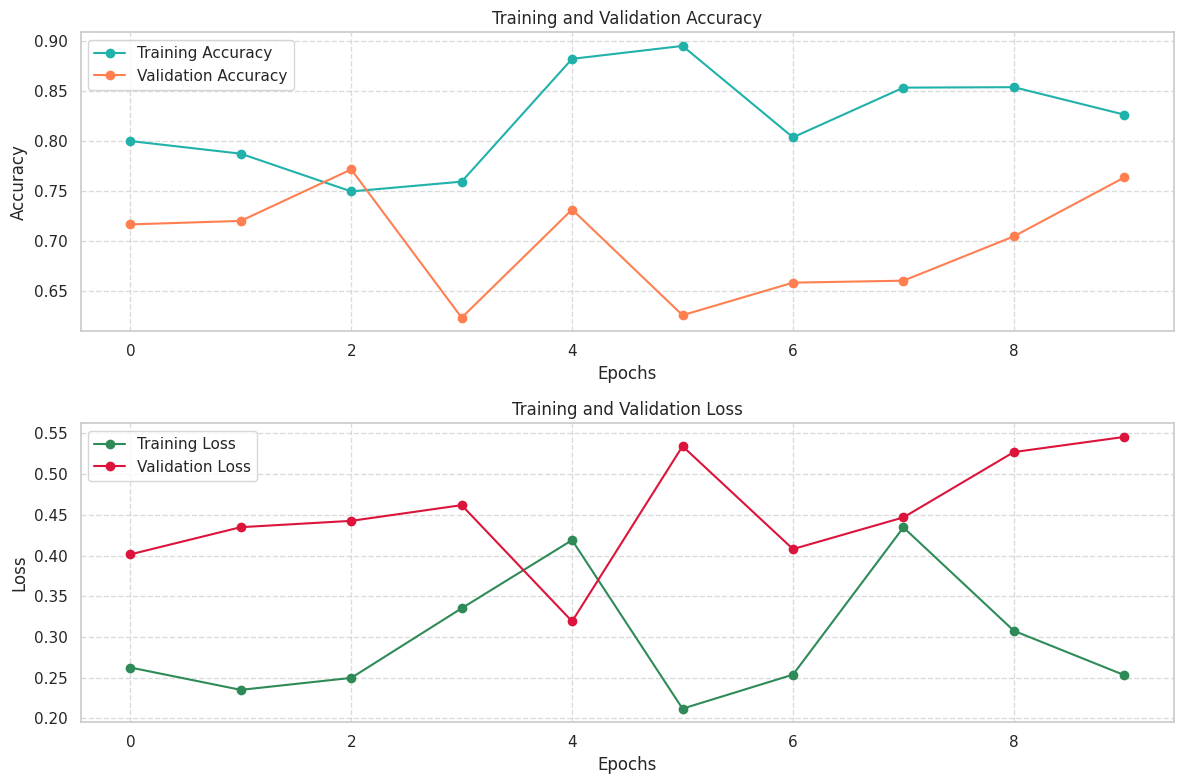

In [ ]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='lightseagreen', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='coral', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plotting training and validation loss
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss', color='seagreen', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='crimson', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

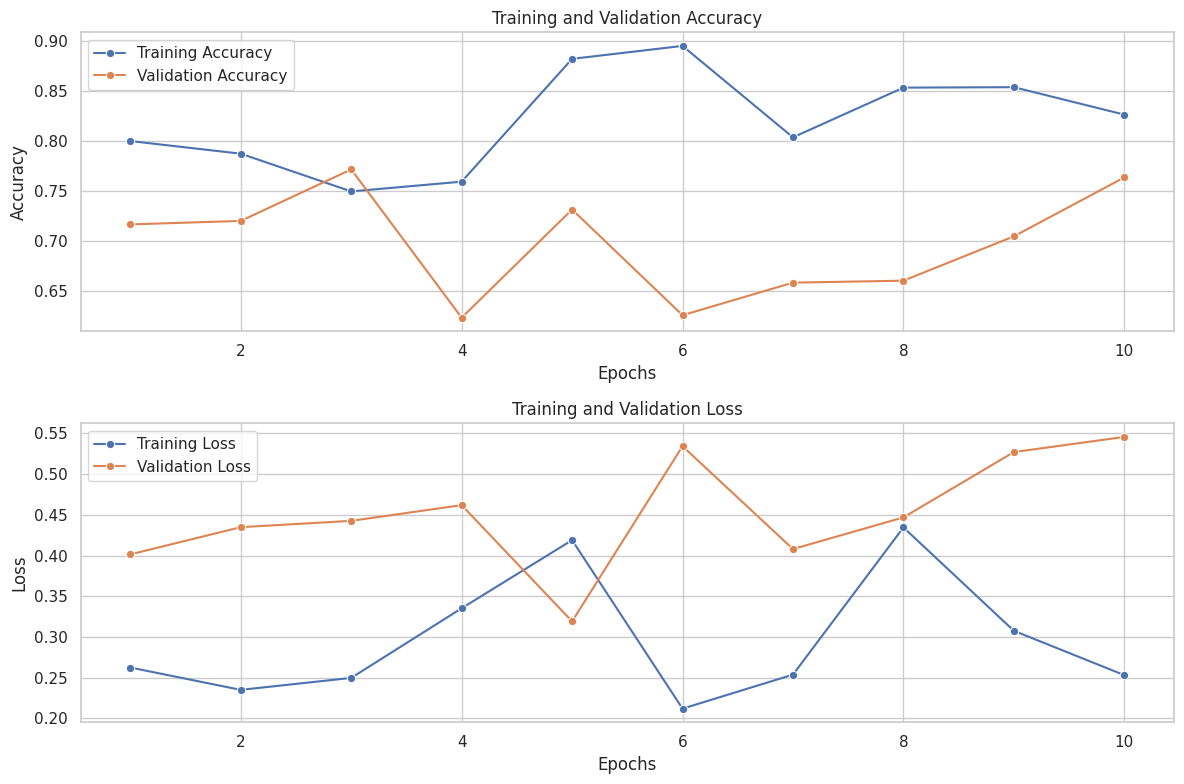

In [ ]:
# Set Seaborn style
sns.set(style="whitegrid")

# Plotting training and validation accuracy
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.lineplot(x=range(1, len(history.history['accuracy']) + 1), y=history.history['accuracy'], label='Training Accuracy', marker='o')
sns.lineplot(x=range(1, len(history.history['val_accuracy']) + 1), y=history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(2, 1, 2)
sns.lineplot(x=range(1, len(history.history['loss']) + 1), y=history.history['loss'], label='Training Loss', marker='o')
sns.lineplot(x=range(1, len(history.history['val_loss']) + 1), y=history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
# Evaluating the model
val_loss, val_accuracy = model.evaluate(X_test, y_test)
print(f"Validation Accuracy: {val_accuracy}")


839/839 [==============================] - 86s 103ms/step - loss: 0.2366 - accuracy: 0.9551
Validation Accuracy: 0.9551416039466858


In [ ]:
# Evaluating the model
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Train Accuracy: {train_accuracy}")

3355/3355 [==============================] - 304s 91ms/step - loss: 0.1107 - accuracy: 0.9628
Train Accuracy: 0.9628439545631409


In [ ]:
# Making Predictions
predictions = model.predict(X_test)
predicted_labels = [np.argmax(pred) for pred in predictions]


839/839 [==============================] - 188s 223ms/step


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, predicted_labels))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     25713
           1       0.00      0.00      0.00      1127

    accuracy                           0.96     26840
   macro avg       0.48      0.50      0.49     26840
weighted avg       0.92      0.96      0.94     26840



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
results = list(zip(df['tweet'][len(X_train):], predicted_labels))
for tweet, label in results[:10]:
    print(f"Tweet: {tweet[:50]}... Label: {label}")


In [ ]:
from keras.preprocessing.sequence import pad_sequences

# Example sequences (a list of lists of integers)
sequences = [
    [1, 2, 3],
    [4, 5],
    [6, 7, 8, 9],
    [11,2,3,5,6,9,8,6,6,5,6,0,1]
]

# Pad sequences to the same length (add zeros at the end)
padded_sequences = pad_sequences(sequences, maxlen=8, padding='post', truncating='post')

print(padded_sequences)


[[ 1  2  3  0  0  0  0  0]
 [ 4  5  0  0  0  0  0  0]
 [ 6  7  8  9  0  0  0  0]
 [11  2  3  5  6  9  8  6]]
